In [ ]:
!wget https://github.com/kboroz/TimeSeriesPrediction/raw/main/Data/kddcup.data_10_percent_corrected.zip

!unzip kddcup.data_10_percent_corrected.zip

--2024-11-29 09:42:17--  https://github.com/kboroz/TimeSeriesPrediction/raw/main/Data/kddcup.data_10_percent_corrected.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/main/Data/kddcup.data_10_percent_corrected.zip [following]
--2024-11-29 09:42:18--  https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/main/Data/kddcup.data_10_percent_corrected.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2136470 (2.0M) [application/zip]
Saving to: ‘kddcup.data_10_percent_corrected.zip.1’

kddcup.data_10_perc 100%[===================>]   2.04M  --.-KB/s    in 0.05s

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('kddcup.data_10_percent_corrected.csv', header=None)

# The last column is the label, separate it from the features
labels = data.iloc[:, -1]
features = data.iloc[:, :-1]

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming `features` and `labels` are already loaded as DataFrames

# Map labels to binary values
labels = labels.map({
    'normal.': 0,
    'neptune.': 1, 'warezclient.': 1, 'ipsweep.': 1, 'portsweep.': 1,
    'teardrop.': 1, 'nmap.': 1, 'satan.': 1, 'smurf.': 1, 'pod.': 1,
    'back.': 1, 'land.': 1, 'guess_passwd.': 1, 'ftp_write.': 1,
    'multihop.': 1, 'rootkit.': 1, 'phf.': 1, 'spy.': 1, 'perl.': 1,
    'buffer_overflow.': 1, 'imap.': 1, 'warezmaster.': 1, 'snmpguess.': 1,
    'snmpgetattack.': 1, 'httptunnel.': 1, 'ps.': 1, 'named.': 1,
    'xlock.': 1, 'xsnoop.': 1, 'sendmail.': 1, 'remote_to_local.': 1
})

# One-hot encode the categorical features (columns 1 to 3 in this dataset)
categorical_features = features.iloc[:, 1:4]  # Assuming these are categorical columns
encoded_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

# Concatenate the encoded features with the rest of the DataFrame
features_no_names = pd.concat([features.iloc[:, :1], encoded_features, features.iloc[:, 4:]], axis=1)

# Fix column name types to ensure consistency
features_no_names.columns = features_no_names.columns.astype(str)  # Convert all column names to strings

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_no_names)

# Convert to FP32
features_scaled = features_scaled.astype(np.float32)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=123)

# Display shapes to confirm
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


x_train shape: (395216, 118), x_test shape: (98805, 118)
y_train shape: (395216,), y_test shape: (98805,)


In [ ]:
input_dim = x_train.shape[1]

# Model hyperparameters
batch_size = 512
latent_dim = 4
max_epochs = 10

# Encoder Network
input_data = Input(shape=(input_dim,), name='encoder_input')

encoder = Dense(96, activation='tanh', name='encoder_1')(input_data)
encoder = Dropout(.1)(encoder)
encoder = Dense(64, activation='tanh', name='encoder_2')(encoder)
encoder = Dropout(.1)(encoder)
encoder = Dense(48, activation='tanh', name='encoder_3')(encoder)
encoder = Dropout(.1)(encoder)
encoder = Dense(16, activation='tanh', name='encoder_4')(encoder)
encoder = Dropout(.1)(encoder)

latent_encoding = Dense(latent_dim, activation='linear', name='latent_encoding')(encoder)

encoder_model = Model(input_data, latent_encoding)
encoder_model.summary()

# Decoder Network
decoder = Dense(16, activation='tanh', name='decoder_1')(latent_encoding)
decoder = Dropout(.1)(decoder)
decoder = Dense(48, activation='tanh', name='decoder_2')(decoder)
decoder = Dropout(.1)(decoder)
decoder = Dense(64, activation='tanh', name='decoder_3')(decoder)
decoder = Dropout(.1)(decoder)
decoder = Dense(96, activation='tanh', name='decoder_4')(decoder)
decoder = Dropout(.1)(decoder)

reconstructed_data = Dense(input_dim, activation='linear', name='reconstructed_data')(decoder)

autoencoder_model = Model(input_data, reconstructed_data)
autoencoder_model.summary()

# Compile the Model
opt = optimizers.Adam(learning_rate=.00001)
autoencoder_model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

# Train the Model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, profile_batch=0, update_freq='epoch', histogram_freq=1)

train_history = autoencoder_model.fit(x_train, x_train,
                                    shuffle=True,
                                    epochs=max_epochs,
                                    batch_size=batch_size,
                                    validation_data=(x_test, x_test),
                                    callbacks=[tensorboard_callback])



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 118)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_1 (Dense)                    │ (None, 96)                  │          11,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_2 (Dense)                    │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_3 (Dense)                    │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_4 (Dense)                    │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_encoding (Dense)              │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,604 (84.39 KB)

 Trainable params: 21,604 (84.39 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 118)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_1 (Dense)                    │ (None, 96)                  │          11,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_2 (Dense)                    │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_3 (Dense)                    │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_4 (Dense)                    │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_encoding (Dense)              │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_1 (Dense)                    │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_2 (Dense)                    │ (None, 48)                  │             816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_3 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_4 (Dense)                    │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reconstructed_data (Dense)           │ (None, 118)                 │          11,446 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,322 (169.23 KB)

 Trainable params: 43,322 (169.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.0127 - loss: 0.0838 - val_accuracy: 1.7206e-04 - val_loss: 0.0353
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0193 - loss: 0.0430 - val_accuracy: 5.6677e-04 - val_loss: 0.0170
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.0322 - loss: 0.0295 - val_accuracy: 0.0015 - val_loss: 0.0113
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.0585 - loss: 0.0229 - val_accuracy: 0.0469 - val_loss: 0.0080
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1145 - loss: 0.0184 - val_accuracy: 0.0597 - val_loss: 0.0061
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.1436 - loss: 0.0151 - val_accuracy: 0.0675 - val_loss: 0.0048
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.1451 - loss: 0.0125 - val_accuracy: 0.0724 - val_loss: 0.0041
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.1427 - loss: 0

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


<Axes: ylabel='Frequency'>

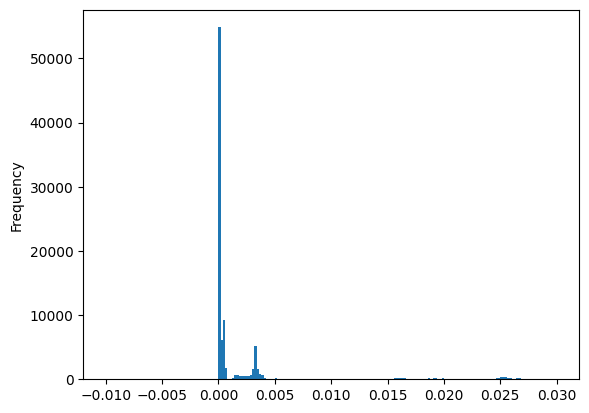

In [ ]:
#Anomal detection

# Reconstruct the data using the trained autoencoder model
x_test_recon = autoencoder_model.predict(x_test)

# The reconstruction score is the mean of the reconstruction errors
reconstruction_scores = np.mean((x_test - x_test_recon)**2, axis=1)

# Store the reconstruction data in a Pandas dataframe
anomaly_data = pd.DataFrame({'recon_score': reconstruction_scores})

# If our reconstruction scores are normally distributed, we can use their statistics
anomaly_data.describe()

# Plotting the density will give us an idea of how the reconstruction scores are distributed
plt.xlabel('Reconstruction Score')
anomaly_data['recon_score'].plot.hist(bins=200, range=[-.01, .03])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


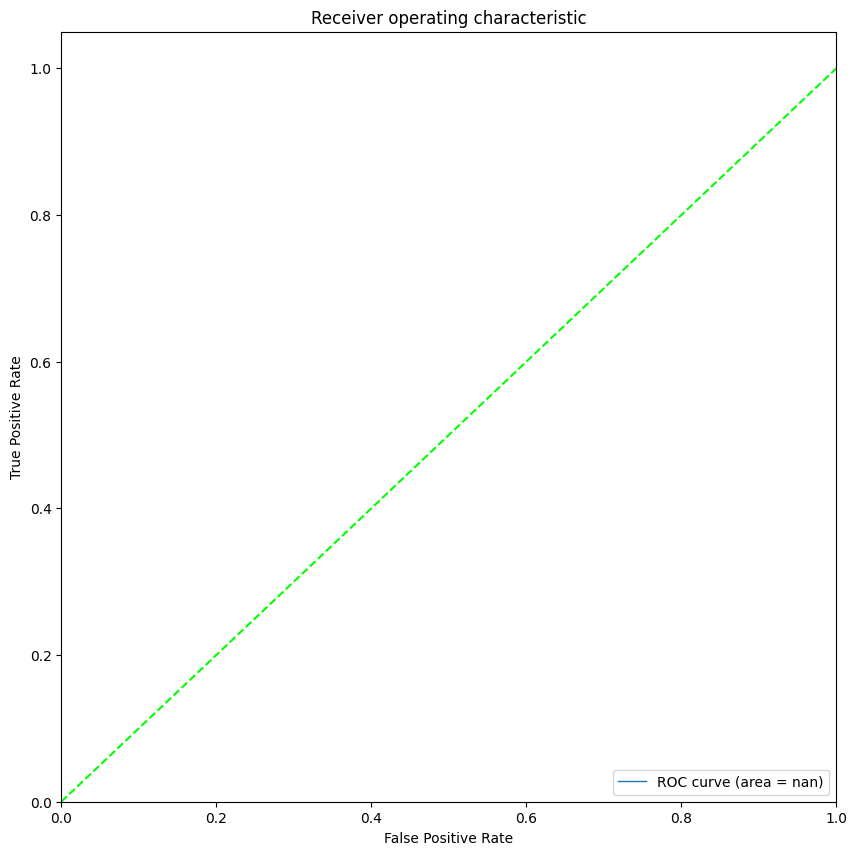

inf
0.04149451828561723
Confusion Matrix: 


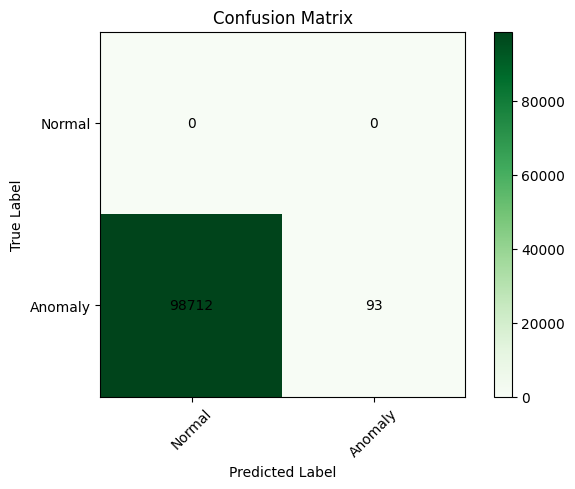

In [ ]:
#threshold setting

# Convert our labels to binary (assuming 'normal' is 0 and 'anomaly' is 1)
def convert_label_to_binary(labels):
    normal_idx = np.where(labels == 0)
    my_labels = labels.copy()
    my_labels[my_labels != 0] = 0
    my_labels[my_labels == 0] = 1
    return my_labels

binary_labels = convert_label_to_binary(y_test)

# Add the binary labels to our anomaly dataframe
anomaly_data['binary_labels'] = binary_labels

# Check if the reconstruction statistics are different for labeled anomalies
anomaly_data.groupby(by='binary_labels').describe()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(binary_labels, reconstruction_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='lime', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Optimal Threshold
optimal_threshold_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_idx]
print(optimal_threshold)

# Statistical Threshold
recon_mean = np.mean(reconstruction_scores)
recon_stddev = np.std(reconstruction_scores)
stats_threshold = recon_mean + 5*recon_stddev
print(stats_threshold)

# Choose a threshold
thresh = stats_threshold  # or use optimal_threshold

# Predict labels based on the threshold
pred_labels = (reconstruction_scores > thresh).astype(int)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
results = confusion_matrix(binary_labels, pred_labels)
print ('Confusion Matrix: ')

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plot_confusion_matrix(results, ['Normal','Anomaly'])
